In [1]:
from argopy import IndexFetcher

In [2]:
ix = IndexFetcher(cache=True).region([-45.,-10.,56.,67.])
print(ix)
#load index
ds = ix.to_dataframe()

<indexfetcher.erddap>
Name: Ifremer erddap Argo Index fetcher for a space/time region
API: https://www.ifremer.fr/erddap
Domain: [x=-45.00/-10.00; y=56.00/67.00; t=1900-01-01/2100-12-31]
Backend: erddap
User mode: standard

In [6]:
deep_codes = [838, 849, 862, 864, 874]
ds['deep'] = [ds['profiler_code'][i] in deep_codes for i in range(len(ds))]

In [43]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib import cm
import matplotlib.patches as patches
import glob
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
land_color = [120/255, 108/255, 92/255]
land_feature=cfeature.NaturalEarthFeature(category='physical',name='land',scale='50m',facecolor=land_color)

Text(0.5, 0.98, 'Core argo profiles distribution')

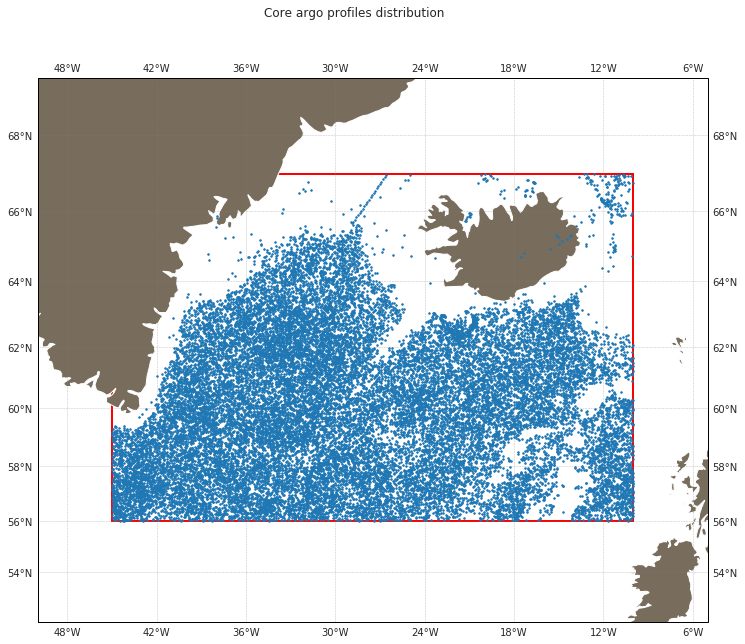

In [54]:
bbox = [-45.,-10.,56.,67.]
bgbox = [-50,-5,52,68]

fig=plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())
ax.add_feature(land_feature, edgecolor=None)
ax.set_extent(bgbox)
a = ax.plot(ds[~ds['deep']]['longitude'].values,ds[~ds['deep']]['latitude'].values,'.',markersize=3.0,transform=ccrs.PlateCarree())
box = patches.Rectangle((bbox[0],bbox[2]),bbox[1]-bbox[0],bbox[3]-bbox[2],linewidth=2, edgecolor='r', facecolor='none',transform=ccrs.PlateCarree())
ax.add_patch(box)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

plt.suptitle('Core argo profiles distribution')

Text(0.5, 0.98, 'Deep argo profiles distribution')

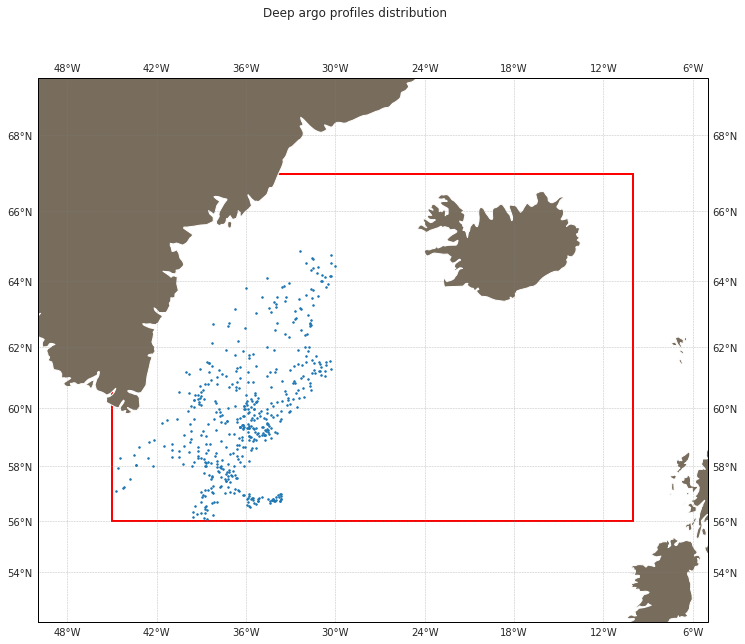

In [53]:
fig=plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())
ax.add_feature(land_feature, edgecolor=None)
ax.set_extent(bgbox)
a = ax.plot(ds[ds['deep']]['longitude'].values,ds[ds['deep']]['latitude'].values,'.',markersize=3.0,transform=ccrs.PlateCarree())
box = patches.Rectangle((bbox[0],bbox[2]),bbox[1]-bbox[0],bbox[3]-bbox[2],linewidth=2, edgecolor='r', facecolor='none',transform=ccrs.PlateCarree())
ax.add_patch(box)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

plt.suptitle('Deep argo profiles distribution')